In [3]:
# 데이터 불러오기
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

food = pd.read_csv('Food_Supply_kcal_Data.csv')
life = pd.read_csv('healthy_lifestyle_city_2021.csv')

#food
#life

In [4]:
## food 전처리 ##
food['Undernourished'] = food['Undernourished'].map(lambda x: '1.0' if x == '<2.5' else x).astype('float64')
food = food.drop('Unit (all except Population)', axis=1)
food = food.dropna()

# 결측값 유무 확인
#food.isnull().sum()

# country 통일
food.loc[food['Country'] == 'United States of America', 'Country'] = 'United States'
food.loc[food['Country'] == 'Russian Federation', 'Country'] = 'Russia'
food.loc[food['Country'] == 'Korea, South', 'Country'] = 'South Korea'

In [5]:
## life 전처리 ##
col_name = {
    'City': 'Country',
    'Rank': 'Rank',
    'Sunshine hours(City)': 'Sunshine hours',
    'Cost of a bottle of water(City)': 'Cost of a bottle of water',
    'Obesity levels(Country)': 'Obesity levels',
    'Life expectancy(years) (Country)': 'Life expectancy(years)',
    'Pollution(Index score) (City)': 'Pollution(Index score)',
    'Annual avg. hours worked': 'Annual avg. hours worked',
    'Happiness levels(Country)': 'Happiness levels',
    'Outdoor activities(City)': 'Outdoor activities',
    'Number of take out places(City)': 'Number of take out places',
    'Cost of a monthly gym membership(City)': 'Cost of a monthly gym membership'
}
life.rename(columns=col_name, inplace=True)

# 결측치 정제 (결측치들 평균 값으로 대체)
life['Sunshine hours'] = life['Sunshine hours'].replace('-', pd.NA)
life['Sunshine hours'] = pd.to_numeric(life['Sunshine hours'], errors='coerce')
mean_Sunshine_hours = life['Sunshine hours'].mean()
life['Sunshine hours'].fillna(mean_Sunshine_hours, inplace=True)
#life['Sunshine hours']

life['Pollution(Index score)'] = life['Pollution(Index score)'].replace('-', pd.NA)
life['Pollution(Index score)'] = pd.to_numeric(life['Pollution(Index score)'], errors='coerce')
mean_Pollution = life['Pollution(Index score)'].mean()
life['Pollution(Index score)'].fillna(mean_Pollution, inplace=True)
#life['Pollution(Index score)']

life['Annual avg. hours worked'] = life['Annual avg. hours worked'].replace('-', pd.NA)
life['Annual avg. hours worked'] = pd.to_numeric(life['Annual avg. hours worked'], errors='coerce')
mean_worked = life['Annual avg. hours worked'].mean()
life['Annual avg. hours worked'].fillna(mean_worked, inplace=True)
#life['Annual avg. hours worked']

# 단위 기호 빼기
life['Obesity levels'] = life['Obesity levels'].astype(str)
life['Obesity levels'] = life['Obesity levels'].str.rstrip('%').astype('float')
#print(life['Obesity levels'])


life['Cost of a bottle of water'] = life['Cost of a bottle of water'].astype(str)
life['Cost of a bottle of water'] = life['Cost of a bottle of water'].str.replace('£', '').astype('float')
#print(life['Cost of a bottle of water'])

life['Cost of a monthly gym membership'] = life['Cost of a monthly gym membership'].astype(str)
life['Cost of a monthly gym membership'] = life['Cost of a monthly gym membership'].str.replace('£', '').astype('float')
#print(life['Cost of a monthly gym membership'])

# city -> country
country_mapping = {
    'Amsterdam': 'Netherlands',
    'Sydney': 'Australia',
    'Vienna': 'Austria',
    'Stockholm': 'Sweden',
    'Copenhagen': 'Denmark',
    'Helsinki': 'Finland',
    'Fukuoka': 'Japan',
    'Berlin': 'Germany',
    'Barcelona': 'Spain',
    'Vancouver': 'Canada',
    'Melbourne': 'Australia',
    'Beijing': 'China',
    'Bangkok': 'Thailand',
    'Buenos Aires': 'Argentina',
    'Toronto': 'Canada',
    'Madrid': 'Spain',
    'Jakarta': 'Indonesia',
    'Seoul': 'South Korea',
    'Frankfurt': 'Germany',
    'Geneva': 'Switzerland',
    'Tel Aviv': 'Israel',
    'Istanbul': 'Turkey',
    'Cairo': 'Egypt',
    'Taipei': 'Taiwan',
    'Los Angeles': 'United States',
    'Mumbai': 'India',
    'Boston': 'United States',
    'Dublin': 'Ireland',
    'Tokyo': 'Japan',
    'Chicago': 'United States',
    'Hong Kong': 'Hong Kong',
    'Shanghai': 'China',
    'Brussels': 'Belgium',
    'San Francisco': 'United States',
    'Paris': 'France',
    'Sao Paulo': 'Brazil',
    'Zurich': 'Switzerland',
    'London': 'United Kingdom',
    'Johannesburg': 'South Africa',
    'Milan': 'Italy',
    'Washington, D.C.': 'United States',
    'New York': 'United States',
    'Moscow': 'Russia',
    'Mexico City': 'Mexico'
}
life['Country'] = life['Country'].replace(country_mapping)

In [6]:
# 전처리한 food 확인하기
# food

In [7]:
# 전처리한 life 확인하기
# life

In [14]:
import pandas as pd

# 'Country'를 기준으로 두 데이터셋 merge
food_and_life = pd.merge(food, life, on='Country', how='inner')

food_and_life

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Sunshine hours,Cost of a bottle of water,Obesity levels,Life expectancy(years),Pollution(Index score),Annual avg. hours worked,Happiness levels,Outdoor activities,Number of take out places,Cost of a monthly gym membership
0,Argentina,1.4354,14.9869,1.0650,0.0000,16.7927,0.8643,0.2006,1.4663,9.4459,...,2525.000000,0.57,28.3,75.9,52.640000,1672.909091,5.97,246,1435,22.45
1,Australia,1.9783,15.6146,1.9027,0.0000,11.6430,0.4681,0.6040,1.6611,7.4902,...,2636.000000,1.48,29.0,82.1,26.860000,1712.000000,7.22,406,1103,41.66
2,Australia,1.9783,15.6146,1.9027,0.0000,11.6430,0.4681,0.6040,1.6611,7.4902,...,2363.000000,1.57,29.0,82.1,25.900000,1712.000000,7.22,243,813,36.89
3,Austria,2.8161,15.6106,5.2532,0.0000,12.3748,0.7853,0.4062,1.5976,5.0095,...,1884.000000,1.94,20.1,81.0,17.330000,1501.000000,7.29,132,1008,25.74
4,Belgium,2.3089,14.1587,4.7771,0.0000,13.0441,0.6900,0.5971,1.3800,3.2776,...,1546.000000,2.11,22.1,80.4,62.670000,1583.000000,6.86,55,988,25.34
5,Brazil,1.4314,13.2061,1.5238,0.0000,14.5913,0.4464,0.2309,1.7239,7.1571,...,2003.000000,0.44,22.1,73.9,79.780000,1672.909091,6.37,158,3355,16.07
6,China,1.2768,16.1844,1.1773,0.0209,17.3827,1.2349,1.2872,1.2924,9.8896,...,2671.000000,0.26,6.2,75.4,85.430000,1672.909091,5.12,223,261,38.62
7,China,1.2768,16.1844,1.1773,0.0209,17.3827,1.2349,1.2872,1.2924,9.8896,...,1776.000000,0.29,6.2,75.4,77.400000,1672.909091,5.12,108,346,44.68
8,Denmark,2.4239,17.7505,5.0547,0.0000,13.3757,0.9607,0.9459,1.5814,5.0103,...,1630.000000,2.19,19.7,79.8,21.240000,1380.000000,7.64,154,523,32.53
9,Egypt,0.0301,4.1999,0.5269,0.0000,32.2144,0.1957,0.6322,2.5591,1.6408,...,3542.000000,0.16,32.0,70.7,91.740000,1672.909091,4.15,323,250,23.25


In [9]:
# 5. 물, 일조량 등의 환경적 요인과 섭취하는 음식 종류의 관계
# 환경적 요인은 3가지 선정 - Sunshine hours, Cost of a bottle of water, Pollution(Index score)

정규성 검정 결과 (Sunshine hours): Statistic=0.9403, p-value=0.03542043641209602356
정규성 검정 결과 (Alcoholic Beverages): Statistic=0.8839, p-value=0.00067175965523347259
Levene 등분산성 검정 결과 (Alcoholic Beverages): Statistic=129.0405, p-value=0.00000000000000000331
Fligner 등분산성 검정 결과 (Alcoholic Beverages): Statistic=50.5194, p-value=0.00000000000117993968
Spearman 검정 결과 (Alcoholic Beverages): 상관계수=-0.4715, p-value=0.00213388246069442546


정규성 검정 결과 (Sunshine hours): Statistic=0.9403, p-value=0.03542043641209602356
정규성 검정 결과 (Animal Products): Statistic=0.9071, p-value=0.00310120009817183018
Levene 등분산성 검정 결과 (Animal Products): Statistic=127.9051, p-value=0.00000000000000000410
Fligner 등분산성 검정 결과 (Animal Products): Statistic=50.5192, p-value=0.00000000000118002668
Spearman 검정 결과 (Animal Products): 상관계수=-0.5543, p-value=0.00020638750549964308


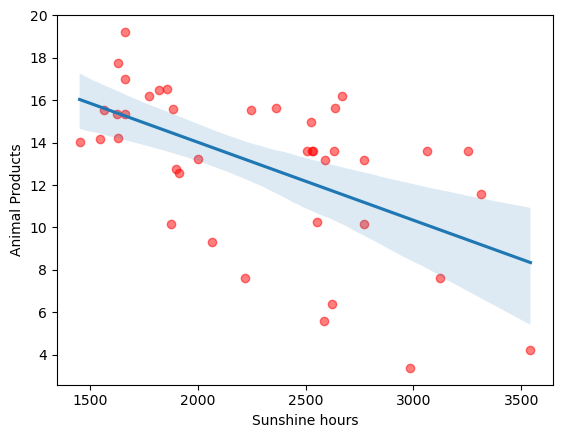



정규성 검정 결과 (Sunshine hours): Statistic=0.9403, p-value=0.03542043641209602356
정규성 검정 결과 (Animal fats): Statistic=0.8786, p-value=0.00048128684284165502
Levene 등분산성 검정 결과 (Animal fats): Statistic=128.8043, p-value=0.00000000000000000346
Fligner 등분산성 검정 결과 (Animal fats): Statistic=50.5193, p-value=0.00000000000117996216
Spearman 검정 결과 (Animal fats): 상관계수=-0.7538, p-value=0.00000001970422329008


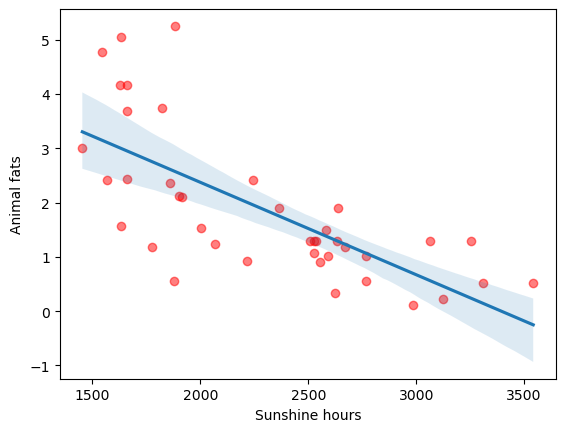



정규성 검정 결과 (Sunshine hours): Statistic=0.9403, p-value=0.03542043641209602356
정규성 검정 결과 (Aquatic Products, Other): Statistic=0.1851, p-value=0.00000000000013620871
Levene 등분산성 검정 결과 (Aquatic Products, Other): Statistic=129.3220, p-value=0.00000000000000000314
Fligner 등분산성 검정 결과 (Aquatic Products, Other): Statistic=52.4836, p-value=0.00000000000043384702
Spearman 검정 결과 (Aquatic Products, Other): 상관계수=0.0220, p-value=0.89296733559292928994


정규성 검정 결과 (Sunshine hours): Statistic=0.9403, p-value=0.03542043641209602356
정규성 검정 결과 (Cereals - Excluding Beer): Statistic=0.8158, p-value=0.00001471969426347641
Levene 등분산성 검정 결과 (Cereals - Excluding Beer): Statistic=127.1700, p-value=0.00000000000000000472
Fligner 등분산성 검정 결과 (Cereals - Excluding Beer): Statistic=50.5222, p-value=0.00000000000117825255
Spearman 검정 결과 (Cereals - Excluding Beer): 상관계수=0.1252, p-value=0.44135514389001073710


정규성 검정 결과 (Sunshine hours): Statistic=0.9403, p-value=0.03542043641209602356
정규성 검정 결과 (Eggs): Statistic=0.9

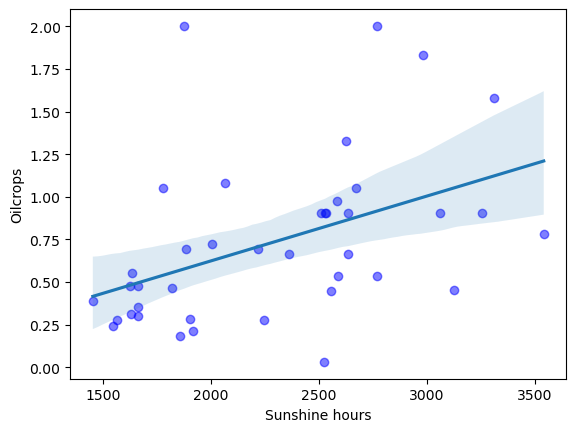



정규성 검정 결과 (Sunshine hours): Statistic=0.9403, p-value=0.03542043641209602356
정규성 검정 결과 (Pulses): Statistic=0.6325, p-value=0.00000000892414053766
Levene 등분산성 검정 결과 (Pulses): Statistic=129.1545, p-value=0.00000000000000000324
Fligner 등분산성 검정 결과 (Pulses): Statistic=50.5225, p-value=0.00000000000117808075
Spearman 검정 결과 (Pulses): 상관계수=0.3922, p-value=0.01230978664380788165


정규성 검정 결과 (Sunshine hours): Statistic=0.9403, p-value=0.03542043641209602356
정규성 검정 결과 (Spices): Statistic=0.5452, p-value=0.00000000060068788832
Levene 등분산성 검정 결과 (Spices): Statistic=129.2857, p-value=0.00000000000000000316
Fligner 등분산성 검정 결과 (Spices): Statistic=50.5193, p-value=0.00000000000117996415
Spearman 검정 결과 (Spices): 상관계수=0.1294, p-value=0.42629248633273353342


정규성 검정 결과 (Sunshine hours): Statistic=0.9403, p-value=0.03542043641209602356
정규성 검정 결과 (Starchy Roots): Statistic=0.9011, p-value=0.00205439096316695213
Levene 등분산성 검정 결과 (Starchy Roots): Statistic=129.1432, p-value=0.00000000000000000324
Fligner 등

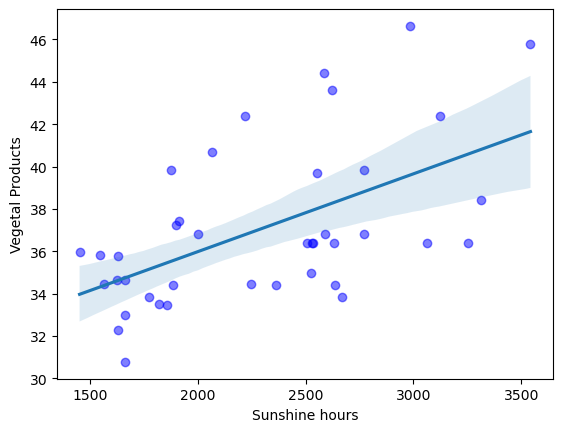



정규성 검정 결과 (Sunshine hours): Statistic=0.9403, p-value=0.03542043641209602356
정규성 검정 결과 (Vegetable Oils): Statistic=0.9594, p-value=0.15972861647605895996
Levene 등분산성 검정 결과 (Vegetable Oils): Statistic=128.3776, p-value=0.00000000000000000375
Fligner 등분산성 검정 결과 (Vegetable Oils): Statistic=50.5226, p-value=0.00000000000117799621
Spearman 검정 결과 (Vegetable Oils): 상관계수=0.2394, p-value=0.13687734747418084380


정규성 검정 결과 (Sunshine hours): Statistic=0.9403, p-value=0.03542043641209602356
정규성 검정 결과 (Vegetables): Statistic=0.8345, p-value=0.00003868791100103408
Levene 등분산성 검정 결과 (Vegetables): Statistic=129.1609, p-value=0.00000000000000000323
Fligner 등분산성 검정 결과 (Vegetables): Statistic=50.5205, p-value=0.00000000000117929024
Spearman 검정 결과 (Vegetables): 상관계수=-0.1232, p-value=0.44899477250871755452




In [10]:
# 5-1. Sunshine hours

# 필요한 라이브러리 불러오기
from scipy.stats import shapiro, levene, spearmanr, pearsonr, fligner
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 비교할 열들과 종속 변수 선택
cols = ['Alcoholic Beverages', 'Animal Products', 'Animal fats',
        'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
        'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
        'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
        'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar Crops',
        'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils',
        'Vegetables']
dependent_variable = 'Sunshine hours'

# 각 열에 대해 분석 수행
for col in cols:
    # 데이터 추출
    a = food_and_life[dependent_variable]
    b = food_and_life[col]
    
    # 정규성 검정 - Shapiro-Wilk test
    stat_a, p_a = shapiro(a)
    stat_b, p_b = shapiro(b)

    print(f'정규성 검정 결과 ({dependent_variable}): Statistic={stat_a:.4f}, p-value={p_a:.20f}')
    print(f'정규성 검정 결과 ({col}): Statistic={stat_b:.4f}, p-value={p_b:.20f}')

    # 등분산성 검정 - Levene
    stat_levene, p_value_levene = levene(a, b)
    print(f'Levene 등분산성 검정 결과 ({col}): Statistic={stat_levene:.4f}, p-value={p_value_levene:.20f}')

    # 등분산성 검정 - Fligner
    stat_fligner, p_value_fligner = fligner(a, b)
    print(f'Fligner 등분산성 검정 결과 ({col}): Statistic={stat_fligner:.4f}, p-value={p_value_fligner:.20f}')

    # 스피어만 검정 또는 피어슨 검정 선택
    if p_a < 0.05 or p_b < 0.05 or stat_levene < 0.05 or stat_fligner < 0.05:
        # 정규성 또는 등분산성 가정이 깨질 경우 스피어만 검정 수행
        correlation, p_value = spearmanr(a, b)
        print(f'Spearman 검정 결과 ({col}): 상관계수={correlation:.4f}, p-value={p_value:.20f}')
    else:
        # 가정이 만족할 경우 피어슨 검정 수행
        correlation, p_value = pearsonr(a, b)
        print(f'Pearson 검정 결과 ({col}): 상관계수={correlation:.4f}, p-value={p_value:.20f}')

    # 절대값이 0.3보다 클 경우 스캐터플롯 출력
    if abs(correlation) > 0.5:
        sns.regplot(x=a, y=b, scatter_kws={'alpha': 0.5, 'color': 'red' if correlation < 0 else 'blue'})
        plt.xlabel(dependent_variable)
        plt.ylabel(col)
        plt.show()

    print("\n")


정규성 검정 결과 (Cost of a bottle of water): Statistic=0.9465, p-value=0.05748805776238441467
정규성 검정 결과 (Alcoholic Beverages): Statistic=0.8839, p-value=0.00067175965523347259
Levene 등분산성 검정 결과 (Alcoholic Beverages): Statistic=0.2357, p-value=0.62869318301652943326
Fligner 등분산성 검정 결과 (Alcoholic Beverages): Statistic=0.5707, p-value=0.44998999996910526988
Spearman 검정 결과 (Alcoholic Beverages): 상관계수=0.5888, p-value=0.00006434263990635755


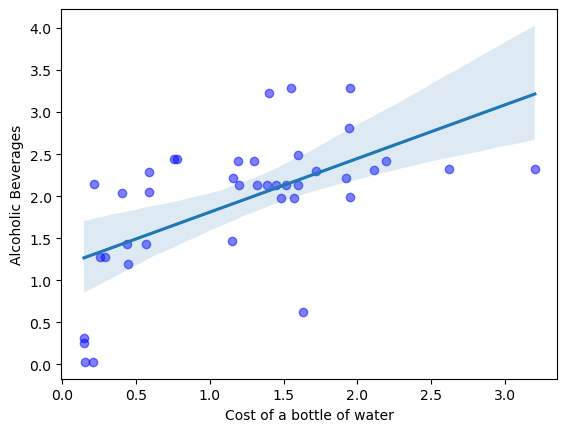



정규성 검정 결과 (Cost of a bottle of water): Statistic=0.9465, p-value=0.05748805776238441467
정규성 검정 결과 (Animal Products): Statistic=0.9071, p-value=0.00310120009817183018
Levene 등분산성 검정 결과 (Animal Products): Statistic=23.7593, p-value=0.00000562801038834780
Fligner 등분산성 검정 결과 (Animal Products): Statistic=18.7068, p-value=0.00001524354057273578
Spearman 검정 결과 (Animal Products): 상관계수=0.6803, p-value=0.00000136921034545184


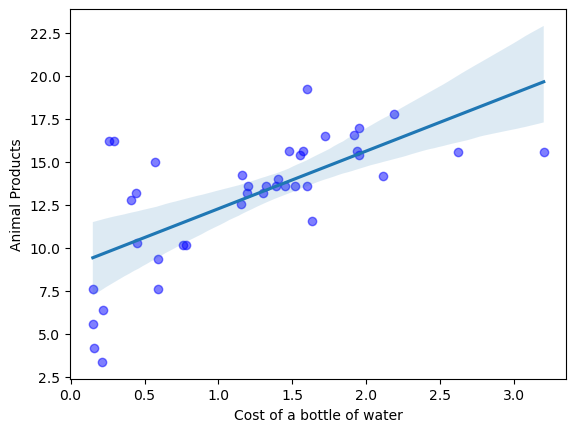



정규성 검정 결과 (Cost of a bottle of water): Statistic=0.9465, p-value=0.05748805776238441467
정규성 검정 결과 (Animal fats): Statistic=0.8786, p-value=0.00048128684284165502
Levene 등분산성 검정 결과 (Animal fats): Statistic=4.2533, p-value=0.04250402831297313971
Fligner 등분산성 검정 결과 (Animal fats): Statistic=1.9016, p-value=0.16789486580242138358
Spearman 검정 결과 (Animal fats): 상관계수=0.7047, p-value=0.00000038691332925819


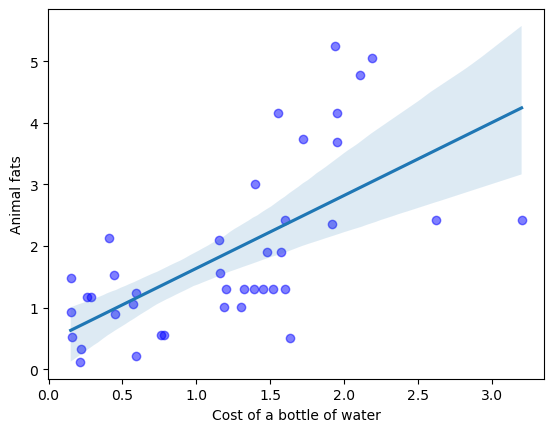



정규성 검정 결과 (Cost of a bottle of water): Statistic=0.9465, p-value=0.05748805776238441467
정규성 검정 결과 (Aquatic Products, Other): Statistic=0.1851, p-value=0.00000000000013620871
Levene 등분산성 검정 결과 (Aquatic Products, Other): Statistic=70.2915, p-value=0.00000000000169405217
Fligner 등분산성 검정 결과 (Aquatic Products, Other): Statistic=49.6773, p-value=0.00000000000181230509
Spearman 검정 결과 (Aquatic Products, Other): 상관계수=-0.3175, p-value=0.04589081493093536551


정규성 검정 결과 (Cost of a bottle of water): Statistic=0.9465, p-value=0.05748805776238441467
정규성 검정 결과 (Cereals - Excluding Beer): Statistic=0.8158, p-value=0.00001471969426347641
Levene 등분산성 검정 결과 (Cereals - Excluding Beer): Statistic=23.0292, p-value=0.00000753438173957060
Fligner 등분산성 검정 결과 (Cereals - Excluding Beer): Statistic=33.2362, p-value=0.00000000816174988802
Spearman 검정 결과 (Cereals - Excluding Beer): 상관계수=-0.6814, p-value=0.00000130081101947319


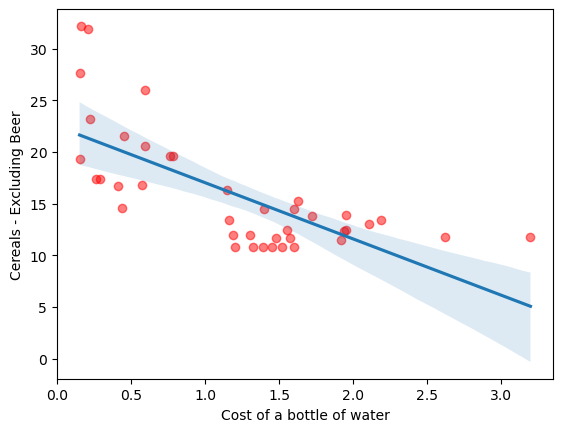



정규성 검정 결과 (Cost of a bottle of water): Statistic=0.9465, p-value=0.05748805776238441467
정규성 검정 결과 (Eggs): Statistic=0.9431, p-value=0.04410246759653091431
Levene 등분산성 검정 결과 (Eggs): Statistic=26.3673, p-value=0.00000202352978492302
Fligner 등분산성 검정 결과 (Eggs): Statistic=19.8891, p-value=0.00000820670668332520
Spearman 검정 결과 (Eggs): 상관계수=0.0129, p-value=0.93713273368979699285


정규성 검정 결과 (Cost of a bottle of water): Statistic=0.9465, p-value=0.05748805776238441467
정규성 검정 결과 (Fish, Seafood): Statistic=0.8514, p-value=0.00009709889855002984
Levene 등분산성 검정 결과 (Fish, Seafood): Statistic=6.7905, p-value=0.01097286990929169891
Fligner 등분산성 검정 결과 (Fish, Seafood): Statistic=7.4784, p-value=0.00624432417886309089
Spearman 검정 결과 (Fish, Seafood): 상관계수=-0.0589, p-value=0.71789124584950381180


정규성 검정 결과 (Cost of a bottle of water): Statistic=0.9465, p-value=0.05748805776238441467
정규성 검정 결과 (Fruits - Excluding Wine): Statistic=0.9448, p-value=0.05022114515304565430
Levene 등분산성 검정 결과 (Fruits - Excludi

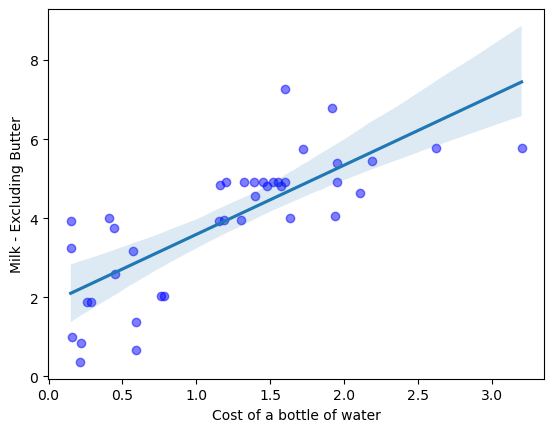



정규성 검정 결과 (Cost of a bottle of water): Statistic=0.9465, p-value=0.05748805776238441467
정규성 검정 결과 (Miscellaneous): Statistic=0.5979, p-value=0.00000000292857627038
Levene 등분산성 검정 결과 (Miscellaneous): Statistic=52.1673, p-value=0.00000000029607114077
Fligner 등분산성 검정 결과 (Miscellaneous): Statistic=38.0685, p-value=0.00000000068302457517
Spearman 검정 결과 (Miscellaneous): 상관계수=-0.1586, p-value=0.32839407791893471256


정규성 검정 결과 (Cost of a bottle of water): Statistic=0.9465, p-value=0.05748805776238441467
정규성 검정 결과 (Offals): Statistic=0.7783, p-value=0.00000246007084570010
Levene 등분산성 검정 결과 (Offals): Statistic=49.0073, p-value=0.00000000078595701411
Fligner 등분산성 검정 결과 (Offals): Statistic=34.3982, p-value=0.00000000449132233859
Spearman 검정 결과 (Offals): 상관계수=-0.1221, p-value=0.45286278640705490695


정규성 검정 결과 (Cost of a bottle of water): Statistic=0.9465, p-value=0.05748805776238441467
정규성 검정 결과 (Oilcrops): Statistic=0.8919, p-value=0.00111754878889769316
Levene 등분산성 검정 결과 (Oilcrops): Statistic

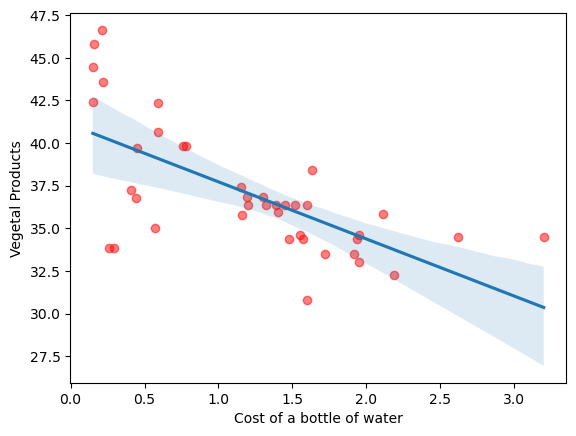



정규성 검정 결과 (Cost of a bottle of water): Statistic=0.9465, p-value=0.05748805776238441467
정규성 검정 결과 (Vegetable Oils): Statistic=0.9594, p-value=0.15972861647605895996
Levene 등분산성 검정 결과 (Vegetable Oils): Statistic=30.4423, p-value=0.00000043285138692882
Fligner 등분산성 검정 결과 (Vegetable Oils): Statistic=18.0270, p-value=0.00002177947688643389
Pearson 검정 결과 (Vegetable Oils): 상관계수=0.2958, p-value=0.06382553684040929987


정규성 검정 결과 (Cost of a bottle of water): Statistic=0.9465, p-value=0.05748805776238441467
정규성 검정 결과 (Vegetables): Statistic=0.8345, p-value=0.00003868791100103408
Levene 등분산성 검정 결과 (Vegetables): Statistic=9.7692, p-value=0.00249275351698682911
Fligner 등분산성 검정 결과 (Vegetables): Statistic=8.3911, p-value=0.00377070954076411460
Spearman 검정 결과 (Vegetables): 상관계수=-0.0495, p-value=0.76144745540346758794




In [12]:
# 5-2. Cost of a bottle of water

# 필요한 라이브러리 불러오기
from scipy.stats import shapiro, levene, spearmanr, pearsonr, fligner
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 비교할 열들과 종속 변수 선택
cols = ['Alcoholic Beverages', 'Animal Products', 'Animal fats',
        'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
        'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
        'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
        'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar Crops',
        'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils',
        'Vegetables']
dependent_variable = 'Cost of a bottle of water'

# 각 열에 대해 분석 수행
for col in cols:
    # 데이터 추출
    a = food_and_life[dependent_variable]
    b = food_and_life[col]
    
    # 정규성 검정 - Shapiro-Wilk test
    stat_a, p_a = shapiro(a)
    stat_b, p_b = shapiro(b)

    print(f'정규성 검정 결과 ({dependent_variable}): Statistic={stat_a:.4f}, p-value={p_a:.20f}')
    print(f'정규성 검정 결과 ({col}): Statistic={stat_b:.4f}, p-value={p_b:.20f}')

    # 등분산성 검정 - Levene
    stat_levene, p_value_levene = levene(a, b)
    print(f'Levene 등분산성 검정 결과 ({col}): Statistic={stat_levene:.4f}, p-value={p_value_levene:.20f}')

    # 등분산성 검정 - Fligner
    stat_fligner, p_value_fligner = fligner(a, b)
    print(f'Fligner 등분산성 검정 결과 ({col}): Statistic={stat_fligner:.4f}, p-value={p_value_fligner:.20f}')

    # 스피어만 검정 또는 피어슨 검정 선택
    if p_a < 0.05 or p_b < 0.05 or stat_levene < 0.05 or stat_fligner < 0.05:
        # 정규성 또는 등분산성 가정이 깨질 경우 스피어만 검정 수행
        correlation, p_value = spearmanr(a, b)
        print(f'Spearman 검정 결과 ({col}): 상관계수={correlation:.4f}, p-value={p_value:.20f}')
    else:
        # 가정이 만족할 경우 피어슨 검정 수행
        correlation, p_value = pearsonr(a, b)
        print(f'Pearson 검정 결과 ({col}): 상관계수={correlation:.4f}, p-value={p_value:.20f}')

    # 절대값이 0.3보다 클 경우 스캐터플롯 출력
    if abs(correlation) > 0.5:
        sns.regplot(x=a, y=b, scatter_kws={'alpha': 0.5, 'color': 'red' if correlation < 0 else 'blue'})
        plt.xlabel(dependent_variable)
        plt.ylabel(col)
        plt.show()

    print("\n")


정규성 검정 결과 (Pollution(Index score)): Statistic=0.9643, p-value=0.23448808491230010986
정규성 검정 결과 (Alcoholic Beverages): Statistic=0.8839, p-value=0.00067175965523347259
Levene 등분산성 검정 결과 (Alcoholic Beverages): Statistic=91.8415, p-value=0.00000000000000800728
Fligner 등분산성 검정 결과 (Alcoholic Beverages): Statistic=44.1251, p-value=0.00000000003080516090
Spearman 검정 결과 (Alcoholic Beverages): 상관계수=-0.6338, p-value=0.00001133018854598826


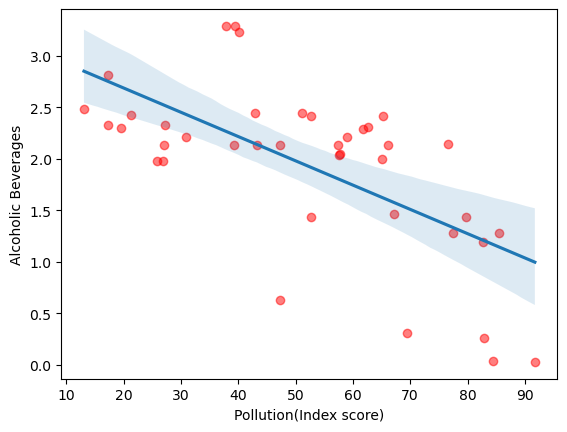



정규성 검정 결과 (Pollution(Index score)): Statistic=0.9643, p-value=0.23448808491230010986
정규성 검정 결과 (Animal Products): Statistic=0.9071, p-value=0.00310120009817183018
Levene 등분산성 검정 결과 (Animal Products): Statistic=67.9402, p-value=0.00000000000318686309
Fligner 등분산성 검정 결과 (Animal Products): Statistic=37.6198, p-value=0.00000000085967093824
Spearman 검정 결과 (Animal Products): 상관계수=-0.5939, p-value=0.00005343598141503764


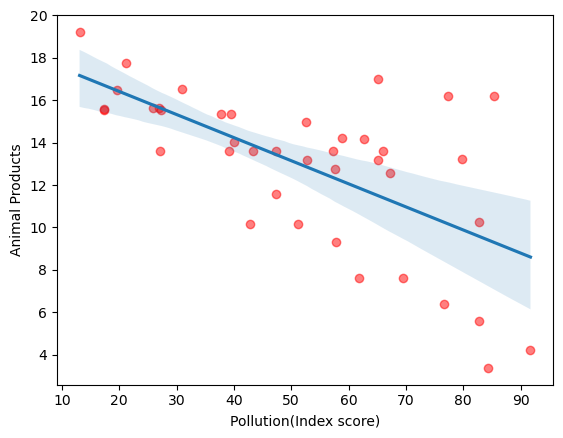



정규성 검정 결과 (Pollution(Index score)): Statistic=0.9643, p-value=0.23448808491230010986
정규성 검정 결과 (Animal fats): Statistic=0.8786, p-value=0.00048128684284165502
Levene 등분산성 검정 결과 (Animal fats): Statistic=86.8080, p-value=0.00000000000002621174
Fligner 등분산성 검정 결과 (Animal fats): Statistic=43.5843, p-value=0.00000000004060899874
Spearman 검정 결과 (Animal fats): 상관계수=-0.5685, p-value=0.00012949393601630676


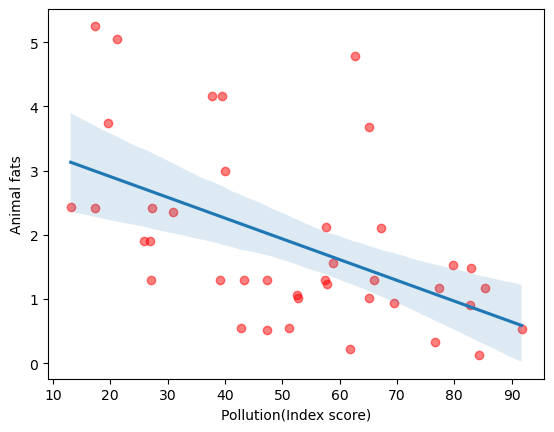



정규성 검정 결과 (Pollution(Index score)): Statistic=0.9643, p-value=0.23448808491230010986
정규성 검정 결과 (Aquatic Products, Other): Statistic=0.1851, p-value=0.00000000000013620871
Levene 등분산성 검정 결과 (Aquatic Products, Other): Statistic=97.6651, p-value=0.00000000000000212173
Fligner 등분산성 검정 결과 (Aquatic Products, Other): Statistic=51.8212, p-value=0.00000000000060790795
Spearman 검정 결과 (Aquatic Products, Other): 상관계수=0.1971, p-value=0.22283435734523998617


정규성 검정 결과 (Pollution(Index score)): Statistic=0.9643, p-value=0.23448808491230010986
정규성 검정 결과 (Cereals - Excluding Beer): Statistic=0.8158, p-value=0.00001471969426347641
Levene 등분산성 검정 결과 (Cereals - Excluding Beer): Statistic=51.9893, p-value=0.00000000031259517648
Fligner 등분산성 검정 결과 (Cereals - Excluding Beer): Statistic=30.9621, p-value=0.00000002631130796466
Spearman 검정 결과 (Cereals - Excluding Beer): 상관계수=0.5894, p-value=0.00006288286679897697


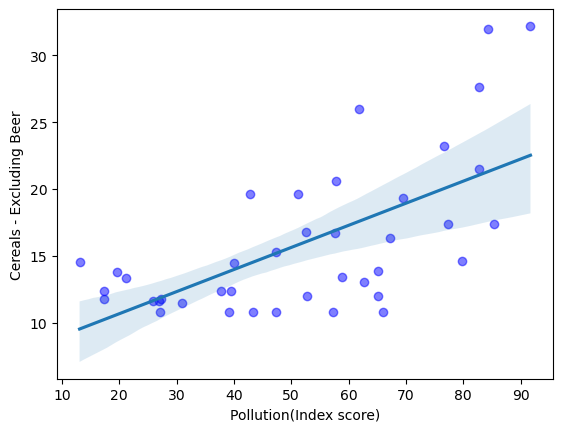



정규성 검정 결과 (Pollution(Index score)): Statistic=0.9643, p-value=0.23448808491230010986
정규성 검정 결과 (Eggs): Statistic=0.9431, p-value=0.04410246759653091431
Levene 등분산성 검정 결과 (Eggs): Statistic=95.4943, p-value=0.00000000000000346254
Fligner 등분산성 검정 결과 (Eggs): Statistic=43.4140, p-value=0.00000000004429985845
Spearman 검정 결과 (Eggs): 상관계수=-0.0631, p-value=0.69904661750246555041


정규성 검정 결과 (Pollution(Index score)): Statistic=0.9643, p-value=0.23448808491230010986
정규성 검정 결과 (Fish, Seafood): Statistic=0.8514, p-value=0.00009709889855002984
Levene 등분산성 검정 결과 (Fish, Seafood): Statistic=93.9377, p-value=0.00000000000000493834
Fligner 등분산성 검정 결과 (Fish, Seafood): Statistic=43.6865, p-value=0.00000000003854124078
Spearman 검정 결과 (Fish, Seafood): 상관계수=0.0458, p-value=0.77912424831846027740


정규성 검정 결과 (Pollution(Index score)): Statistic=0.9643, p-value=0.23448808491230010986
정규성 검정 결과 (Fruits - Excluding Wine): Statistic=0.9448, p-value=0.05022114515304565430
Levene 등분산성 검정 결과 (Fruits - Excluding Wine

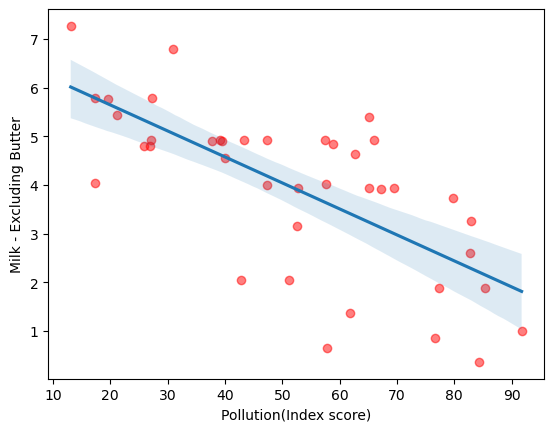



정규성 검정 결과 (Pollution(Index score)): Statistic=0.9643, p-value=0.23448808491230010986
정규성 검정 결과 (Miscellaneous): Statistic=0.5979, p-value=0.00000000292857627038
Levene 등분산성 검정 결과 (Miscellaneous): Statistic=96.9946, p-value=0.00000000000000246662
Fligner 등분산성 검정 결과 (Miscellaneous): Statistic=48.0346, p-value=0.00000000000418773269
Spearman 검정 결과 (Miscellaneous): 상관계수=0.0175, p-value=0.91458657251337893701


정규성 검정 결과 (Pollution(Index score)): Statistic=0.9643, p-value=0.23448808491230010986
정규성 검정 결과 (Offals): Statistic=0.7783, p-value=0.00000246007084570010
Levene 등분산성 검정 결과 (Offals): Statistic=96.7684, p-value=0.00000000000000259557
Fligner 등분산성 검정 결과 (Offals): Statistic=45.5110, p-value=0.00000000001517849546
Spearman 검정 결과 (Offals): 상관계수=0.1497, p-value=0.35646008198540601875


정규성 검정 결과 (Pollution(Index score)): Statistic=0.9643, p-value=0.23448808491230010986
정규성 검정 결과 (Oilcrops): Statistic=0.8919, p-value=0.00111754878889769316
Levene 등분산성 검정 결과 (Oilcrops): Statistic=93.9289, p

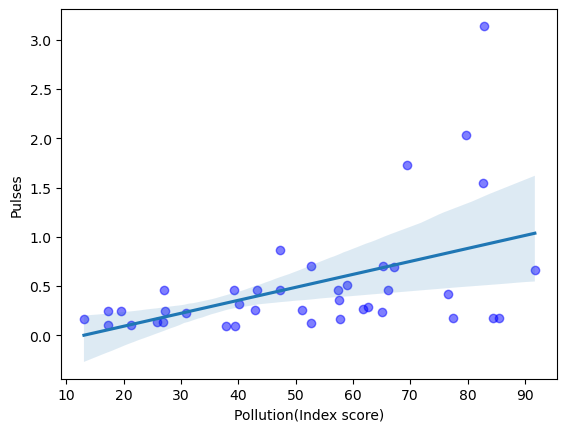



정규성 검정 결과 (Pollution(Index score)): Statistic=0.9643, p-value=0.23448808491230010986
정규성 검정 결과 (Spices): Statistic=0.5452, p-value=0.00000000060068788832
Levene 등분산성 검정 결과 (Spices): Statistic=96.9200, p-value=0.00000000000000250842
Fligner 등분산성 검정 결과 (Spices): Statistic=46.0070, p-value=0.00000000001178302609
Spearman 검정 결과 (Spices): 상관계수=0.0334, p-value=0.83804711692390254640


정규성 검정 결과 (Pollution(Index score)): Statistic=0.9643, p-value=0.23448808491230010986
정규성 검정 결과 (Starchy Roots): Statistic=0.9011, p-value=0.00205439096316695213
Levene 등분산성 검정 결과 (Starchy Roots): Statistic=94.0058, p-value=0.00000000000000486188
Fligner 등분산성 검정 결과 (Starchy Roots): Statistic=43.7863, p-value=0.00000000003662569510
Spearman 검정 결과 (Starchy Roots): 상관계수=-0.0962, p-value=0.55505580452168179484


정규성 검정 결과 (Pollution(Index score)): Statistic=0.9643, p-value=0.23448808491230010986
정규성 검정 결과 (Stimulants): Statistic=0.9445, p-value=0.04908559098839759827
Levene 등분산성 검정 결과 (Stimulants): Statistic=96.12

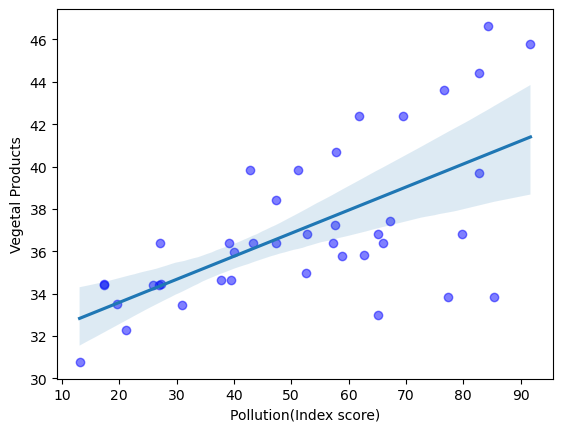



정규성 검정 결과 (Pollution(Index score)): Statistic=0.9643, p-value=0.23448808491230010986
정규성 검정 결과 (Vegetable Oils): Statistic=0.9594, p-value=0.15972861647605895996
Levene 등분산성 검정 결과 (Vegetable Oils): Statistic=78.6708, p-value=0.00000000000019320538
Fligner 등분산성 검정 결과 (Vegetable Oils): Statistic=41.9032, p-value=0.00000000009590596391
Pearson 검정 결과 (Vegetable Oils): 상관계수=-0.2234, p-value=0.16584844113513796948


정규성 검정 결과 (Pollution(Index score)): Statistic=0.9643, p-value=0.23448808491230010986
정규성 검정 결과 (Vegetables): Statistic=0.8345, p-value=0.00003868791100103408
Levene 등분산성 검정 결과 (Vegetables): Statistic=94.3628, p-value=0.00000000000000448053
Fligner 등분산성 검정 결과 (Vegetables): Statistic=43.8896, p-value=0.00000000003474266291
Spearman 검정 결과 (Vegetables): 상관계수=0.0913, p-value=0.57543087861053587861




In [13]:
# 5-3. Pollution(Index score)

# 필요한 라이브러리 불러오기
from scipy.stats import shapiro, levene, spearmanr, pearsonr, fligner
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 비교할 열들과 종속 변수 선택
cols = ['Alcoholic Beverages', 'Animal Products', 'Animal fats',
        'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
        'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
        'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
        'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar Crops',
        'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils',
        'Vegetables']
dependent_variable = 'Pollution(Index score)'

# 각 열에 대해 분석 수행
for col in cols:
    # 데이터 추출
    a = food_and_life[dependent_variable]
    b = food_and_life[col]
    
    # 정규성 검정 - Shapiro-Wilk test
    stat_a, p_a = shapiro(a)
    stat_b, p_b = shapiro(b)

    print(f'정규성 검정 결과 ({dependent_variable}): Statistic={stat_a:.4f}, p-value={p_a:.20f}')
    print(f'정규성 검정 결과 ({col}): Statistic={stat_b:.4f}, p-value={p_b:.20f}')

    # 등분산성 검정 - Levene
    stat_levene, p_value_levene = levene(a, b)
    print(f'Levene 등분산성 검정 결과 ({col}): Statistic={stat_levene:.4f}, p-value={p_value_levene:.20f}')

    # 등분산성 검정 - Fligner
    stat_fligner, p_value_fligner = fligner(a, b)
    print(f'Fligner 등분산성 검정 결과 ({col}): Statistic={stat_fligner:.4f}, p-value={p_value_fligner:.20f}')

    # 스피어만 검정 또는 피어슨 검정 선택
    if p_a < 0.05 or p_b < 0.05 or stat_levene < 0.05 or stat_fligner < 0.05:
        # 정규성 또는 등분산성 가정이 깨질 경우 스피어만 검정 수행
        correlation, p_value = spearmanr(a, b)
        print(f'Spearman 검정 결과 ({col}): 상관계수={correlation:.4f}, p-value={p_value:.20f}')
    else:
        # 가정이 만족할 경우 피어슨 검정 수행
        correlation, p_value = pearsonr(a, b)
        print(f'Pearson 검정 결과 ({col}): 상관계수={correlation:.4f}, p-value={p_value:.20f}')

    # 절대값이 0.3보다 클 경우 스캐터플롯 출력
    if abs(correlation) > 0.5:
        sns.regplot(x=a, y=b, scatter_kws={'alpha': 0.5, 'color': 'red' if correlation < 0 else 'blue'})
        plt.xlabel(dependent_variable)
        plt.ylabel(col)
        plt.show()

    print("\n")
